In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('titanic_toy.csv')

In [92]:
# Check the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [93]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [94]:
X.sample(5)

,Age,Fare,Family
727,NaN,7.7375,0
281,28.0,NaN,0
591,52.0,78.2667,1
394,24.0,16.7000,2
105,28.0,7.8958,0


In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
# Minimum and Maximum value in the Age and Fare column
print("Minimum Age", X['Age'].min(), "& Maximum Age", X['Age'].max())
print("Minimum Face", X['Fare'].min(), "& Maximum Fare", X['Fare'].max())

Minimum Age 0.42 & Maximum Age 80.0
Minimum Face 0.0 & Maximum Fare 512.3292


**The main purpose is to fill those values which are not present in the dataset so that our model can differentiate between actual and imputed values.**

In [97]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [98]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
437,24.0,18.7500,5,24.0,24.0,18.7500,18.7500
165,9.0,20.5250,2,9.0,9.0,20.5250,20.5250
699,42.0,7.6500,0,42.0,42.0,7.6500,7.6500
689,15.0,211.3375,1,15.0,15.0,211.3375,211.3375
681,27.0,76.7292,0,27.0,27.0,76.7292,76.7292


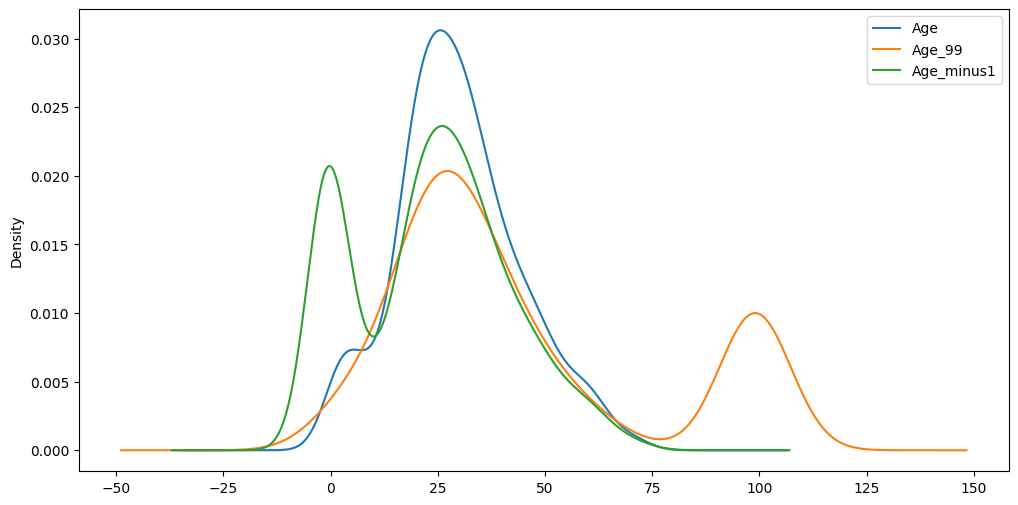

In [99]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

X_train['Age_99'].plot(kind='kde', ax=ax)

X_train['Age_minus1'].plot(kind='kde', ax=ax)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

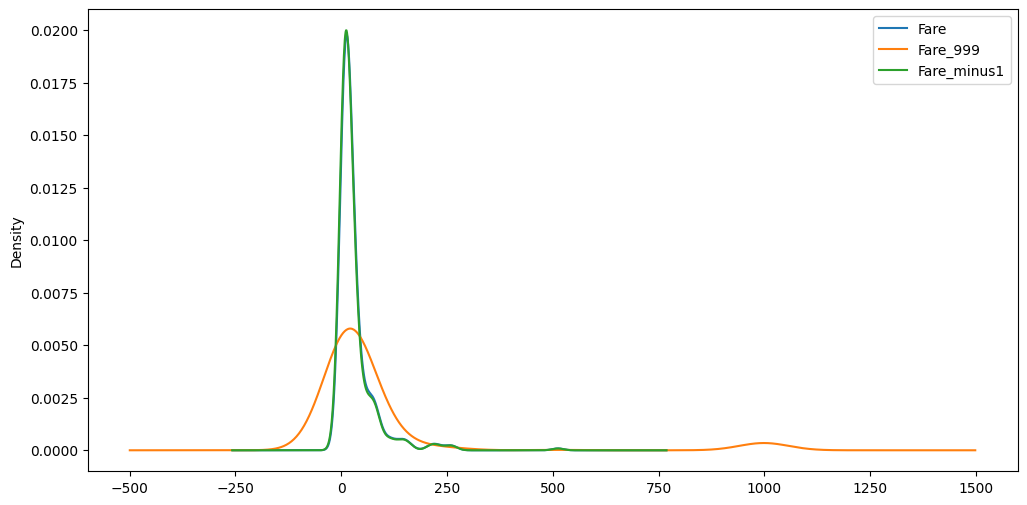

In [100]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

X_train['Fare_999'].plot(kind='kde', ax=ax)

X_train['Fare_minus1'].plot(kind='kde', ax=ax)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [101]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())
print('=======================================================================')
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 imputation:  951.7275570187188
Age Variance after -1 imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 imputation:  47219.202652176304
Fare Variance after -1 imputation:  2378.5676784883494


In [102]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [103]:

X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


## Using Scikit-leran

In [104]:
from sklearn.compose import ColumnTransformer

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
age_imputer = SimpleImputer(strategy='constant', fill_value=99)
fare_imputer = SimpleImputer(strategy='constant', fill_value=999)

In [107]:
trf = ColumnTransformer(transformers=[
    ("Age Imputer", age_imputer, ['Age']),
    ('Fare Imputer', fare_imputer, ['Fare'])
], remainder='passthrough')

In [108]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Age Imputer',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('Fare Imputer',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [109]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [113]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])